### Figure 1

In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools, bathy_tools)
import seabird
import cmocean as cmo
import gsw
from seabird.cnv import fCNV
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import scipy.io

In [2]:
iso_NEP = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/2013_short_slice_NEP36_along_isopycnal_larger_offshore_rho_correct.nc')

iso_spic = iso_NEP.variables['spiciness']
isot = iso_NEP.variables['isot']

vel_iso_NEP = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_NEP36_2013_along_isopycnal_larger_offshore_velocities.nc')
u_vel_iso = vel_iso_NEP.variables['u_velocity']
v_vel_iso = vel_iso_NEP.variables['v_velocity']
isot_vel = vel_iso_NEP.variables['isot']

In [3]:

bathy = nc.Dataset('/data/ssahu/WCVI_sliced_bathy_NEP36_original.nc')


Z = bathy.variables['Bathymetry'][:]

y_wcvi_slice = np.array(np.arange(180,350))
x_wcvi_slice = np.array(np.arange(480,650))

# z_wcvi = Z[y_wcvi_slice, x_wcvi_slice]
lon_wcvi = bathy['nav_lon'][:]#[180:350, 480:650]
lat_wcvi = bathy['nav_lat'][:]#[180:350, 480:650]

In [4]:
survey_mat_file_A = '/data/ssahu/Falkor_2013/mvp/surveyA.mat'
survey_mat_file_B = '/data/ssahu/Falkor_2013/mvp/surveyB.mat'
survey_mat_file_D = '/data/ssahu/Falkor_2013/mvp/surveyD.mat'
survey_mat_file_E = '/data/ssahu/Falkor_2013/mvp/surveyE.mat'
survey_mat_file_G = '/data/ssahu/Falkor_2013/mvp/surveyG.mat'


all_surveys = [survey_mat_file_A, survey_mat_file_B, survey_mat_file_D, \
              survey_mat_file_E, survey_mat_file_G]

lon_falkor = []
lat_falkor = []

for survey_file in all_surveys:
    
    mat = scipy.io.loadmat(survey_file)
    lat_survey = mat['latitude'][:,0]
    lon_survey = mat['longitude'][:,0] - 100
    
    lon_falkor = np.append(arr=lon_falkor, values=lon_survey)
    lat_falkor = np.append(arr=lat_falkor, values=lat_survey)
        

/home/ssahu/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


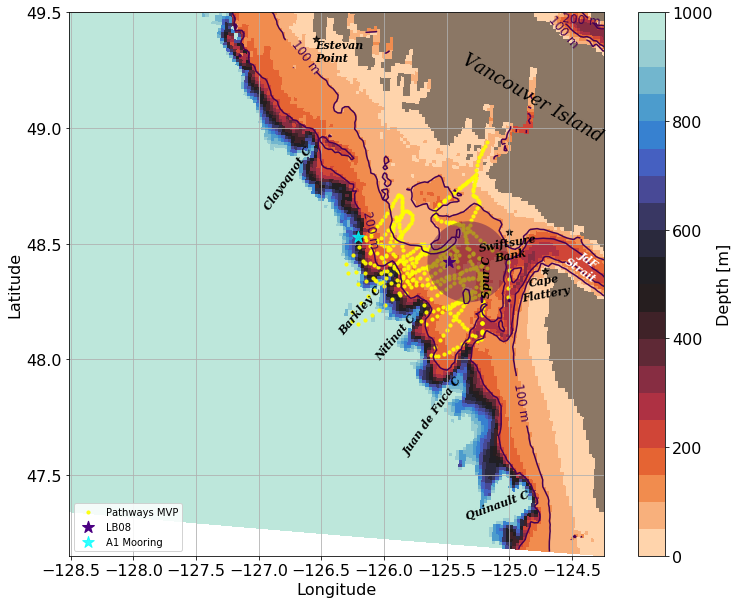

In [12]:
import matplotlib as mpl
# y = np.empty_like(lat_location)
# x = np.empty_like(lat_location)



cmap = plt.cm.get_cmap('icefire_r', 20)
# cmap = cmo.cm.turbid
# cmap = plt.cm.jet
# cmaplist = [cmap(i) for i in range(cmap.N)]
# # force the first color entry to be grey
# cmaplist[0] = (.8, .8, .8, 1.0)

# # create the new map
# cmap = mpl.colors.LinearSegmentedColormap.from_list(
#     'Custom cmap', cmaplist, cmap.N)
# cmap.set_bad('burlywood')
cmap.set_bad('#8b7765')

fig, ax = plt.subplots(1, 1, figsize=(12,10)); ax.grid()

ax.set_aspect(viz_tools.set_aspect(ax, coords='map', lats=lat_wcvi, adjustable='box-forced'))


# ax.relim()
# ax.autoscale_view(True,True,True)
# ax.autoscale_view(scalex=True)
# ax.autoscale(enable=True, axis='both', tight=None)
# bathy_tools.plot_colourmesh(bathy, title = 'WCVI Subset', fig_size=(9, 9), axis_limits=None, colour_map='winter_r', bins=15, land_colour='burlywood')
# p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=500)


p = ax.pcolormesh(lon_wcvi,lat_wcvi,Z, cmap=cmap, vmin=0, vmax=1000)
cbar = fig.colorbar(p, ax=ax)
ax.set_aspect('auto')



CS1 = ax.contour(lon_wcvi, lat_wcvi, Z, np.arange(100,110,10))
CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)

CS1 = ax.contour(lon_wcvi,lat_wcvi,Z, np.arange(200,210,10))
CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)

# CS1 = ax.contour(lon_wcvi,lat_wcvi,Z, np.arange(1000,1010,10))
# CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)

# CS1 = ax.contour(lon_wcvi,lat_wcvi,Z, np.arange(500,510,10))
# CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)



# aspect = 20
# pad_fraction = 0.001
# divider = make_axes_locatable(ax)
# width = axes_size.AxesY(ax, aspect=1./aspect)
# pad = axes_size.Fraction(pad_fraction, width)
# cax = divider.append_axes("right", size=width, pad=pad)
# cbar = fig.colorbar(p, cax=cax)


# for i in np.arange(lat_location.shape[0]):
#     y[i], x[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
# n = np.empty_like(lat_location)
# m = np.empty_like(lat_location)


# for i in np.arange(lat_location.shape[0]):
#     n[i], m[i] = geo_tools.find_closest_model_point(
#                lon_location[i],lat_location[i],lon_wcvi,lat_wcvi,tols={
#         'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

# y = y.astype(int)
# x = x.astype(int)

# n = n.astype(int)
# m = m.astype(int)
# ax.scatter(x[:], y[:], c='orangered', s=100, alpha=0.5, label = 'Falkor CTD locations')

ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

lon_W02 = -124.89500
lat_W02 = 48.04167

lon_W01 = -124.82500
lat_W01 = 48.31500



lon_swift = -125.00
lat_swift = 48.55

ax.scatter(lon_swift, lat_swift,  c='k', marker='*',  s=50, alpha=0.8)#, label = 'Swiftsure Bank')

# S = ("SwB")
S = ("Swiftsure\nBank")
ax.text(lon_swift, lat_swift, S, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='center', rotation = 10,
         va='top', wrap=False)
# ax.text(lon_swift, lat_swift, S, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='left', rotation = 10,
#          va='bottom', wrap=False)


lat_cape = 48.3831
lon_cape = -124.7144

ax.scatter(lon_cape, lat_cape,  c='k', marker='*',  s=50, alpha=0.8)#, label = 'Cape Flattery')

CP = ("Cape\nFlattery")
ax.text(lon_cape, lat_cape, CP, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='center', rotation = 10,
         va='top', wrap=False)


lat_jdfs = 48.5
lon_jdfs = -124.4

JD = ("JdF\nStrait")
ax.text(lon_jdfs, lat_jdfs, JD, fontsize=11, color = 'white', fontweight = 'heavy',family='serif', style='italic', ha='center', rotation = -35,
         va='top', wrap=False)


lat_EP = 49.3835
lon_EP = -126.5447

ax.scatter(lon_EP, lat_EP,  c='k', marker='*',  s=50, alpha=0.8)

EP = ("Estevan\nPoint")
ax.text(lon_EP, lat_EP, EP, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='left', rotation = 0,
         va='top', wrap=False)


lon_LB08 = -125.4775
lat_LB08 = 48.4217




ax.scatter(lon_falkor[::3], lat_falkor[::3],  c='yellow', marker='o',  s=10, alpha=0.9, label = 'Pathways MVP')


ax.scatter(lon_LB08, lat_LB08,  c='indigo', marker='*',  s=150, linewidths=1.2, alpha=1, label = 'LB08')

lon_A1 = -126.20433
lat_A1 = 48.52958

ax.scatter(lon_A1, lat_A1,  c='cyan',marker='*',  s=150, alpha=0.8, label = 'A1 Mooring')

# ax.scatter(lon_W01, lat_W01, c='cyan', s=150, alpha=0.8, label = 'W01')

# ax.scatter(lon_W02, lat_W02, c='red', s=150, alpha=0.8, label = 'W02')

# ax.scatter(lon_location[:], lat_location[:], c='purple', s=100, alpha=0.3, label = 'Falkor CTD locations')

legend = ax.legend(loc='lower left', fancybox=True, framealpha=0.85)

# ax.set_xlabel('x_index')
# ax.set_ylabel('y_index')
# ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)

# viz_tools.plot_land_mask(ax, bathy)#, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
# cbar = fig.colorbar(p, cax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=16)
ax.tick_params(axis='both',labelsize =16)
cbar.ax.tick_params(labelsize=16) 

# t = ("JdF Canyon")
# ax.text(lon_W01, lat_W01, t, fontsize=11, color = 'darkblue', family='serif', style='italic', ha='left', rotation = 55,
#          va='bottom', wrap=True)

t = ("Juan de Fuca C")
ax.text(-125.79, 47.58, t, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='left', rotation = 55,
         va='bottom', wrap=True)



d = ("Clayoquot C")
ax.text( -126.9, 48.64, d, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='left', rotation = 55,
         va='bottom', wrap=True)

C = ("Spur C")
ax.text(-125.14, 48.45, C, fontsize=11, color = 'k',fontweight = 'heavy', family='serif', style='italic', ha='right', rotation = 90,
         va='bottom', wrap=True)

X = ("Barkley C")
ax.text(-126.0, 48.3, X, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='right', rotation = 50,
         va='bottom', wrap=True)

Y = ("Nitinat C")
ax.text(-125.73, 48.18, Y, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='right', rotation = 50,
         va='bottom', wrap=True)


A = ("Quinault C")
ax.text(-124.83, 47.4, A, fontsize=11, color = 'k', fontweight = 'heavy',family='serif', style='italic', ha='right', rotation = 20,
         va='bottom', wrap=True)


V = ("Vancouver Island")
ax.text(-124.85, 49.1, V, fontsize=18, color = 'k', family='serif', style='italic', ha='center', rotation = -30,
         va='bottom', wrap=True)

from matplotlib.patches import Circle,Ellipse
from matplotlib.collections import PatchCollection


patches = []
# circle = Circle((lon_LB08, lat_LB08), 0.35)
# circle = plt.Circle((lon_LB08, lat_LB08), 0.2, color='blue')
circle = Ellipse((lon_LB08+0.15, lat_LB08), 0.65, 0.35,
                     angle=0, linewidth=2, fill=False, zorder=2, label = 'Eddy Region')
patches.append(circle)
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)

ax.grid()






ax.set_ylim(top=49.5, bottom=47.15136337)
ax.set_xlim(left=-128.51552, right=-124.24068451)

path_to_save = '/home/ssahu/saurav/NEP36_Model_Eval_plots/'
# plt.savefig(path_to_save + 'Domain_edited.png')

### Figure 2

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd
import netCDF4 as nc
import os
import scipy.io as sio
from scipy import interpolate, signal
from pyproj import Proj,transform
import sys
sys.path.append('/ocean/ssahu/CANYONS/wcvi/grid/')
from bathy_common import *
from matplotlib import path
from salishsea_tools import viz_tools
from netCDF4 import Dataset
import xarray as xr
from salishsea_tools import nc_tools
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.gridspec as gridspec
%matplotlib inline
from scipy.io import loadmat
from scipy.interpolate import griddata
from dateutil.parser import parse
from salishsea_tools import geo_tools, viz_tools, tidetools, nc_tools
import gsw
import sklearn.cluster as cluster
import seaborn as sns
# sns.set_context('poster')
# sns.set_color_codes()
# plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


/home/ssahu/anaconda3/lib/python3.5/site-packages/xarray/conventions.py:9: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [4]:
zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht'][:32]
y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)


bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]

z0 = np.ma.masked_values(Z, 0)

In [5]:
NEP = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_2013_T_S_Spice_larger_offshore_rho_correct.nc')


sal = NEP.variables['vosaline']
temp = NEP.variables['votemper']
spic = NEP.variables['spiciness']
rho = NEP.variables['density']

sal_mean_august  = np.mean(sal[88-30:119-30,...], axis=0)
temp_mean_august = np.mean(sal[88-30:119-30,...], axis=0)
spic_mean_august = np.mean(spic[88-30:119-30,...], axis=0)
rho_mean_august  = np.mean(rho[88-30:119-30,...], axis=0)

In [6]:
lon.shape

(1021, 715)

In [8]:
lon_wcvi.shape

(170, 170)

In [11]:
lon_LB08 = -125.4775
lat_LB08 = 48.4217


y, x = geo_tools.find_closest_model_point(
           lon_LB08,lat_LB08,lon,lat,tols={
    'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
print(y,x)

264 599


In [12]:

y, x = geo_tools.find_closest_model_point(
           lon_LB08,lat_LB08,lon_wcvi,lat_wcvi,tols={
    'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
    
print(y,x)

84 119


In [4]:
sns.set_context('talk')

In [18]:
sal_0 = sal_mean_august[:24,:,:]
sal_tzyx = np.ma.masked_values(sal_0, 0)

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


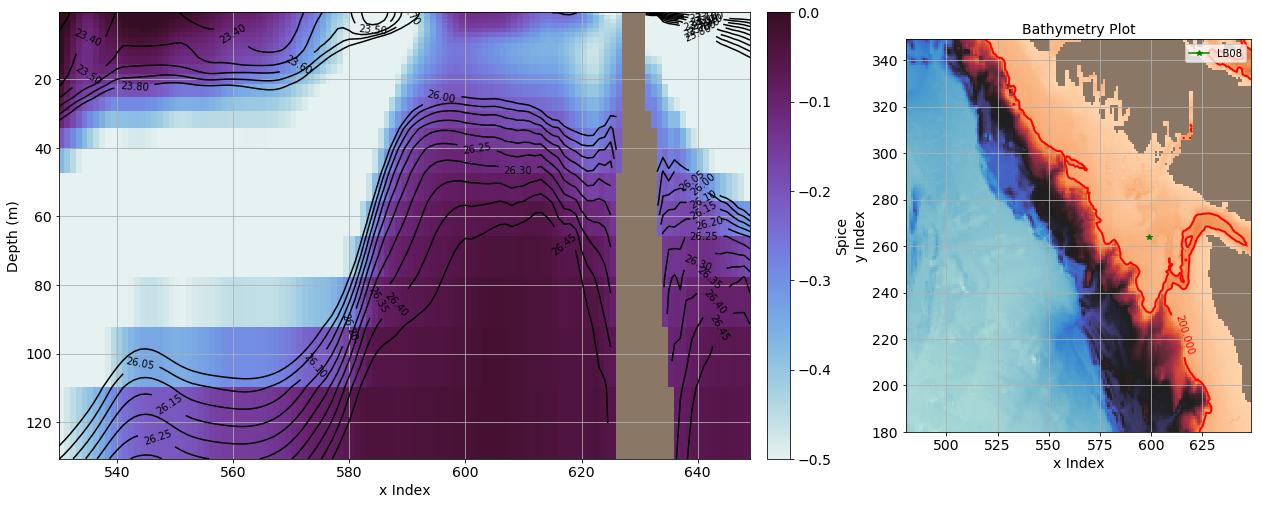

In [51]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
# land_colour = 'burlywood'
# cmap.set_bad('#8b7765')

land_colour = '#8b7765'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.74, 0.125, 0.02, 0.775))
axr.set_position((0.86, 0.125, 0.3, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
# cmap = plt.get_cmap(cmo.cm.deep_r)
cmap = plt.get_cmap('icefire_r')
cmap.set_bad(land_colour)
# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
q = axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[180:350,480:650], cmap=cmap, vmin=0)
# plt.colorbar(q)
axr.plot(
    599, 264, marker='*',  color='green',
    label='LB08',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.75)
axr.set_title('Bathymetry Plot', fontsize = 14)
axr.set_xlabel('x Index', fontsize = 14)
axr.set_ylabel('y Index', fontsize = 14)
CS = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[180:350,480:650], levels = [200],
                 colors=('red',),linestyles=('-',),linewidths=(2,))
axr.tick_params(axis='both',labelsize =14)

axr.clabel(CS)
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
cmap = plt.get_cmap(cmo.cm.dense)
cmap.set_bad(land_colour)
# sal_0 = sal_july[t, :20, :,:]
spic_0 = spic_mean_august[:24,:,:]
spic_tzyx = np.ma.array(spic_0, mask = np.logical_not(sal_tzyx))


mesh = axl.pcolormesh(x_wcvi_slice[50:], zlevels[:24], spic_tzyx[:24,84,50:], cmap=cmap, vmin=-0.5, vmax =0)#, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Spice', fontsize = 14)
cbar.ax.tick_params(labelsize=14)

rho_0 = rho_mean_august[:24,:,:]-1000
rho_tzyx = np.ma.array(rho_0, mask = np.logical_not(sal_tzyx))
# rho_tzyx = np.ma.masked_values(rho_0, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:24])

clines = axl.contour(x_wcvi_slice[50:], zlevels[:24], rho_tzyx[:24,84,50:], np.arange(26, 26.5, 0.05), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)

clines = axl.contour(x_wcvi_slice[50:], zlevels[:24], rho_tzyx[:24,84,50:], np.arange(23, 23.8, 0.1), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)

axl.invert_yaxis()

axl.set_xlabel('x Index', fontsize = 14)
axl.set_ylabel('Depth (m)', fontsize = 14)
axl.tick_params(axis='both',labelsize =14)
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()
# axl.set_title('Vertical section across Barkley Sound indicated on the adjacent bathy map at t={0} days'.format(t))

In [9]:
zlevels[22]

109.72928

In [12]:
sns.set_context('paper')

In [15]:
level = 20

/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


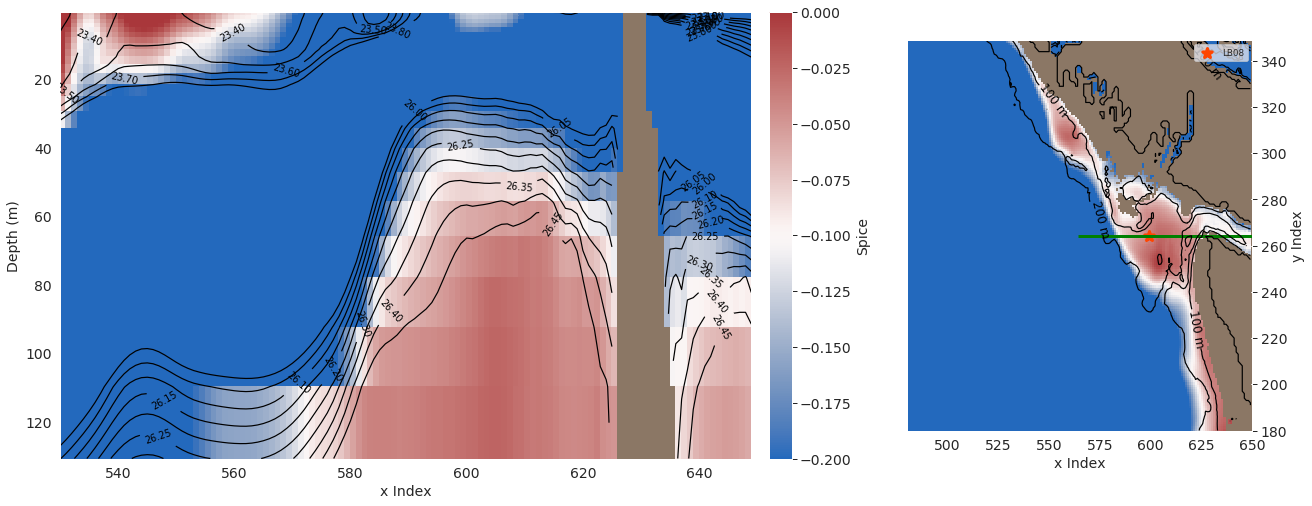

In [20]:
# Set up the figure and axes
fig, (axl, axcb, axr) = plt.subplots(1, 3, figsize=(16, 8))
# land_colour = 'burlywood'
# cmap.set_bad('#8b7765')

land_colour = '#8b7765'
for ax in (axl, axr):
    ax.set_axis_bgcolor(land_colour)
axl.set_position((0.125, 0.125, 0.6, 0.775))
axcb.set_position((0.74, 0.125, 0.02, 0.775))
axr.set_position((0.86, 0.125, 0.3, 0.775))

# Plot thalweg points on bathymetry map
viz_tools.set_aspect(axr)
# cmap = plt.get_cmap(cmo.cm.deep_r)
cmap = plt.get_cmap('vlag')
# cmap.set_bad(land_colour)
# cmap = plt.get_cmap(cmo.cm.dense)
# cmap = plt.get_cmap('icefire')
# cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad(land_colour)

# bathy = bathymetry
# x_slice = np.arange(bathy.shape[1])
# y_slice = np.arange(bathy.shape[0])
# q = axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[180:350,480:650], cmap=cmap, vmin=0)
# q = axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[180:350,480:650], cmap=cmap, vmin=0)
q = axr.pcolormesh(x_wcvi_slice,y_wcvi_slice,np.ma.array(spic_mean_august[level,...], mask = np.logical_not(sal_mean_august[level,...])), cmap=cmap, vmin = -0.2, vmax = 0)
# plt.colorbar(q)

axr.hlines(y=264, xmin=564, xmax=650, color= 'green', linewidths=(3,))
axr.scatter(
    599, 264, marker='*',  s = 100, color='orangered', linewidths=(3,),
    label='LB08',
)
legend = axr.legend(loc='best', fancybox=True, framealpha=0.75)
# axr.set_title('Bathymetry Plot', fontsize = 14)
axr.set_xlabel('x Index', fontsize = 14)
axr.set_ylabel('y Index', fontsize = 14)
CS1 = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[180:350,480:650], np.arange(100,110,10),colors='black')
CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)
CS1 = axr.contour(x_wcvi_slice,y_wcvi_slice,Z[180:350,480:650], np.arange(200,210,10),colors='black')
CLS1 = plt.clabel(CS1, inline=3,fmt='%0.0f m', fontsize=12)

axr.tick_params(axis='both',labelsize =14)

# axr.clabel(CS)
axr.set_xlim(right=650)
axr.yaxis.tick_right()
axr.yaxis.set_label_position("right")
axr.grid()

# Plot 24h average salinity at all depths along thalweg line
t = 12 
# cmap = plt.get_cmap(cmo.cm.dense)
cmap.set_bad(land_colour)
# sal_0 = sal_july[t, :20, :,:]
spic_0 = spic_mean_august[:24,:,:]
spic_tzyx = np.ma.array(spic_0, mask = np.logical_not(sal_tzyx))


mesh = axl.pcolormesh(x_wcvi_slice[50:], zlevels[:24], spic_tzyx[:24,84,50:], cmap=cmap, vmin=-0.2, vmax =0)#, vmin=32, vmax=34)
cbar = plt.colorbar(mesh, cax=axcb)
cbar.set_label('Spice', fontsize = 14)
cbar.ax.tick_params(labelsize=14)

rho_0 = rho_mean_august[:24,:,:]-1000
rho_tzyx = np.ma.array(rho_0, mask = np.logical_not(sal_tzyx))
# rho_tzyx = np.ma.masked_values(rho_0, 0)
x, z = np.meshgrid(x_wcvi_slice, zlevels[:24])

clines = axl.contour(x_wcvi_slice[50:], zlevels[:24], rho_tzyx[:24,84,50:], np.arange(26, 26.5, 0.05), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)

clines = axl.contour(x_wcvi_slice[50:], zlevels[:24], rho_tzyx[:24,84,50:], np.arange(23, 23.8, 0.1), colors='black')
axl.clabel(clines, fmt='%1.2f', inline=True)

bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')
viz_tools.plot_coastline(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='k')

axl.invert_yaxis()

axl.set_xlabel('x Index', fontsize = 14)
axl.set_ylabel('Depth (m)', fontsize = 14)
axl.tick_params(axis='both',labelsize =14)
# axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
axl.grid()

# axl.set_title('Vertical section across Barkley Sound indicated on the adjacent bathy map at t={0} days'.format(t))

### Figure 3

In [7]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools, bathy_tools)
import seabird
import cmocean as cmo
import gsw
from seabird.cnv import fCNV
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import scipy.io

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [8]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):

        self.sg.fig.set_size_inches(self.fig.get_size_inches())



def get_stat_tem(obs_temp, model_temp, z_data):
    
#     func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
#     model_temp_interp = func_temp(z_data)
    
    model_temp_interp = model_temp

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws

def get_stat_sal(obs_sal, model_sal, z_data):
    
#     func_temp = interp1d(zlevels[:model_temp.shape[0]], model_temp, fill_value='extrapolate')
#     model_temp_interp = func_temp(z_data)
    
    model_temp_interp = model_sal
    obs_temp = obs_sal

    obar = np.nanmean(obs_temp)
    mprime = model_temp_interp - obar
    oprime = obs_temp - obar

    diff_sq = np.sum((model_temp_interp-obs_temp)**2)
    add_sq = np.sum((np.abs(mprime) + np.abs(oprime))**2)

    ws = 1-diff_sq/add_sq



    error = model_temp_interp - obs_temp
    gamma2 = np.var(error)/np.var(obs_temp)
    mean_error = np.mean(error)
    mean_abs_error = np.mean(np.abs(error))
    rms_error = np.sqrt(np.mean(error**2))
    
    return gamma2,rms_error,ws


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [9]:
NEP = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_2013_T_S_Spice_larger_offshore_rho_correct.nc')


sal = NEP.variables['vosaline']
temp = NEP.variables['votemper']
spic = NEP.variables['spiciness']
rho = NEP.variables['density']


sal_mean_august  = np.mean(sal[88:119,...], axis=0)
temp_mean_august = np.mean(temp[88:119,...], axis=0)
spic_mean_august = np.mean(spic[88:119,...], axis=0)
rho_mean_august  = np.mean(rho[88:119,...], axis=0)






In [10]:
sns.set_context('paper')
sns.set_style('darkgrid')

In [11]:
zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht'][:32]
y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)


bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

Z = bathy.variables['Bathymetry'][:]

lon = bathy['nav_lon'][180:350,480:650]
lat = bathy['nav_lat'][180:350,480:650]

In [12]:
survey_mat_file_A = '/data/ssahu/Falkor_2013/mvp/surveyA.mat'
survey_mat_file_B = '/data/ssahu/Falkor_2013/mvp/surveyB.mat'
survey_mat_file_D = '/data/ssahu/Falkor_2013/mvp/surveyD.mat'
survey_mat_file_E = '/data/ssahu/Falkor_2013/mvp/surveyE.mat'
survey_mat_file_G = '/data/ssahu/Falkor_2013/mvp/surveyG.mat'


all_surveys = [survey_mat_file_A, survey_mat_file_B, survey_mat_file_D, \
              survey_mat_file_E, survey_mat_file_G]

In [13]:
for file in all_surveys:


    mat = scipy.io.loadmat(file)

    depths_survey = mat['depths'][:,0]
    lat_survey = mat['latitude'][:,0]
    lon_survey = mat['longitude'][:,0] - 100
    # den_survey = mat['density'][:]
    pden_survey = mat['pden'][:]
    temp_survey = mat['temp'][:]
    sal_survey = mat['salinity'][:]
    mtime = mat['mtime'][:,0]

    pressure_survey = np.empty_like(temp_survey)
    SA_survey = np.empty_like(temp_survey)
    CT_survey = np.empty_like(temp_survey)
    spic_survey = np.empty_like(temp_survey)
    rho_survey = np.empty_like(temp_survey)



    for j in np.arange(depths_survey.shape[0]):

        for i in np.arange(lat_survey.shape[0]):

            pressure_survey[j,i] = gsw.p_from_z(-depths_survey[j],lat_survey[i])

            SA_survey[j,i] = gsw.SA_from_SP(sal_survey[j,i], pressure_survey[j,i], lon_survey[i], lat_survey[i])

            CT_survey[j,i] = gsw.CT_from_pt(sal_survey[j,i], temp_survey[j,i])

            spic_survey[j,i] = gsw.spiciness0(SA_survey[j,i], CT_survey[j,i])

            rho_survey[j,i] = gsw.density.rho(SA_survey[j,i], CT_survey[j,i], 0)

            #Values indicate that pden is the true representative of the potential density calculated by rho_survey here


    y = np.empty_like(lat_survey)
    x = np.empty_like(y)


    for i in np.arange(lat_survey.shape[0]):
        y[i], x[i] = geo_tools.find_closest_model_point(
                   lon_survey[i],lat_survey[i],lon,lat,tols={
            'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})


    model_tem_mvp_loc = np.empty((zlevels.shape[0],y.shape[0]))
    model_sal_mvp_loc = np.empty_like(model_tem_mvp_loc)

    for i in np.arange(y.shape[0]):

        model_tem_mvp_loc[:,i] = temp_mean_august[:,y[i].astype(int),x[i].astype(int)]
        model_sal_mvp_loc[:,i] = sal_mean_august[:,y[i].astype(int),x[i].astype(int)]

    ## Now let us bring the MVP data to the model grid points (vertical model depth points)

    mvp_tem_loc = np.empty_like(model_tem_mvp_loc)
    mvp_sal_loc = np.empty_like(model_tem_mvp_loc)

    for k in np.arange(temp_survey.shape[1]):

        f_tem_mvp = interp1d(depths_survey[:], temp_survey[:,k], fill_value="extrapolate")

        tem_loc = f_tem_mvp(np.array(zlevels))

        mvp_tem_loc[:,k] = tem_loc

        f_sal_mvp = interp1d(depths_survey[:], sal_survey[:,k], fill_value="extrapolate")

        sal_loc = f_sal_mvp(np.array(zlevels))

        mvp_sal_loc[:,k] = sal_loc

        depth_mvp = np.empty_like(mvp_sal_loc)

        for p in np.arange(depth_mvp.shape[0]):
            depth_mvp[p,:] = zlevels[p]
            
            
    mvp_tem_loc       = mvp_tem_loc[np.nonzero(model_tem_mvp_loc)]
    model_tem_mvp_loc = model_tem_mvp_loc[np.nonzero(model_tem_mvp_loc)]

    depth_mvp = depth_mvp[np.nonzero(model_sal_mvp_loc)]

    mvp_sal_loc       = mvp_sal_loc[np.nonzero(model_sal_mvp_loc)]
    model_sal_mvp_loc = model_sal_mvp_loc[np.nonzero(model_sal_mvp_loc)]


    if file == survey_mat_file_A:

        model_tem_A = model_tem_mvp_loc
        model_sal_A = model_sal_mvp_loc

        mvp_tem_A   = mvp_tem_loc
        mvp_sal_A   = mvp_sal_loc

        depth_A     = depth_mvp


    if file == survey_mat_file_B:

        model_tem_B = model_tem_mvp_loc
        model_sal_B = model_sal_mvp_loc

        mvp_tem_B   = mvp_tem_loc
        mvp_sal_B   = mvp_sal_loc

        depth_B     = depth_mvp
        
        
    if file == survey_mat_file_D:

        model_tem_D = model_tem_mvp_loc
        model_sal_D = model_sal_mvp_loc

        mvp_tem_D   = mvp_tem_loc
        mvp_sal_D   = mvp_sal_loc

        depth_D     = depth_mvp
        
        mvp_sal_D_actual   = mvp_sal_D[np.where(model_sal_D - mvp_sal_D < 3)]
        model_sal_D_actual = model_sal_D[np.where(model_sal_D - mvp_sal_D < 3)]

        mvp_tem_D_actual   = mvp_tem_D[np.where(model_sal_D - mvp_sal_D < 3)]
        model_tem_D_actual = model_tem_D[np.where(model_sal_D - mvp_sal_D < 3)]

        depth_D_actual = depth_D[np.where(model_sal_D - mvp_sal_D < 3)]
        
        model_tem_D = model_tem_D_actual
        model_sal_D = model_sal_D_actual

        mvp_tem_D   = mvp_tem_D_actual
        mvp_sal_D   = mvp_sal_D_actual

        depth_D     = depth_D_actual


        
    
    if file == survey_mat_file_E:

        model_tem_E = model_tem_mvp_loc
        model_sal_E = model_sal_mvp_loc

        mvp_tem_E   = mvp_tem_loc
        mvp_sal_E   = mvp_sal_loc

        depth_E     = depth_mvp
        
    if file == survey_mat_file_G:

        model_tem_G = model_tem_mvp_loc
        model_sal_G = model_sal_mvp_loc

        mvp_tem_G   = mvp_tem_loc
        mvp_sal_G   = mvp_sal_loc

        depth_G     = depth_mvp   
            
        

#         return np.ndarray.flatten(model_tem_mvp_loc), np.ndarray.flatten(model_sal_mvp_loc), \
#     np.ndarray.flatten(mvp_tem_loc), np.ndarray.flatten(mvp_sal_loc), np.ndarray.flatten(depth_mvp)
    



/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:124: RuntimeWarning: invalid value encountered in less
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:125: RuntimeWarning: invalid value encountered in less
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:127: RuntimeWarning: invalid value encountered in less
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:128: RuntimeWarning: invalid value encountered in less
/home/ssahu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:130: RuntimeWarning: invalid value encountered in less


Model vs Observed


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


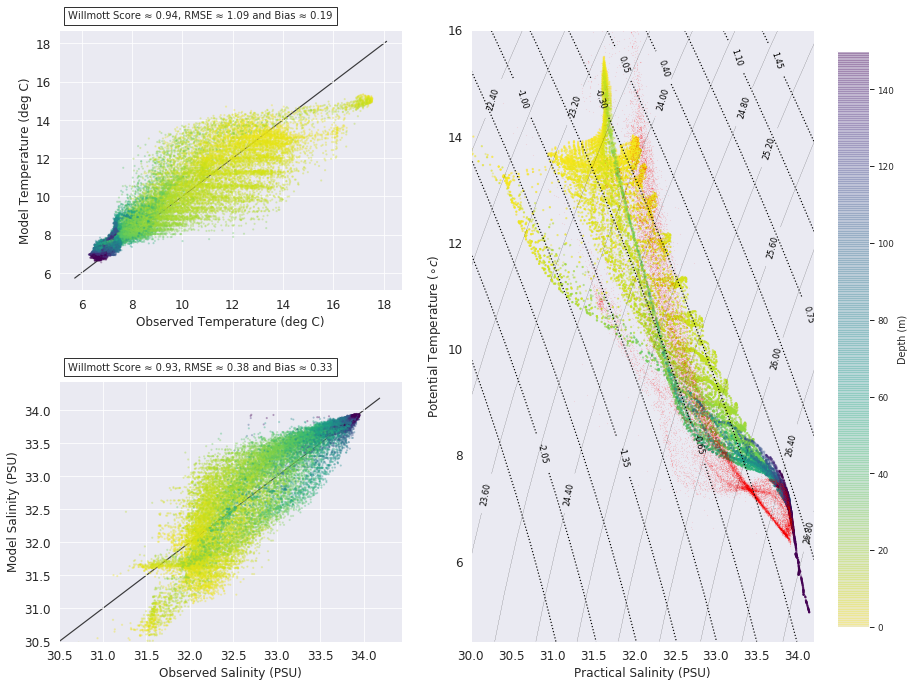

In [29]:
print("Model vs Observed")

cmin = 0
cmax = 150



import matplotlib as mpl
# norm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)
# cmap = plt.get_cmap('summer')
cmap = plt.get_cmap('viridis_r')
# cmap = cmo.cm.deep

df =pd.DataFrame()
# df['Observed_temp'] = np.ndarray.flatten(mvp_tem_D_actual)
# df['Model_temp'] = np.ndarray.flatten(model_tem_D_actual)
# df['Observed_Salinity'] = np.ndarray.flatten(mvp_sal_D_actual)
# df['Model_Salinity'] = np.ndarray.flatten(model_sal_D_actual)
# df["Depth (m)"]  = np.ndarray.flatten(depth_D_actual)

df['Observed_temp'] = np.concatenate((mvp_tem_A, mvp_tem_B, mvp_tem_D, mvp_tem_E, mvp_tem_G))
df['Model_temp'] = np.concatenate((model_tem_A, model_tem_B, model_tem_D, model_tem_E, model_tem_G))
df['Observed_Salinity'] = np.concatenate((mvp_sal_A, mvp_sal_B, mvp_sal_D, mvp_sal_E, mvp_sal_G))
df['Model_Salinity'] = np.concatenate((model_sal_A, model_sal_B, model_sal_D, model_sal_E, model_sal_G))
df["Depth (m)"] = np.concatenate((depth_A, depth_B, depth_D, depth_E, depth_G))


# depth_mvp_all = np.empty_like(mvp_sal_loc)

# for p in np.arange(depth_mvp_all.shape[0]):
#     depth_mvp_all[p,:] = zlevels[p]



# fig, (ax1,ax2,ax3)  = plt.subplots(1,3,figsize=(15,5))

fig = plt.figure(1, figsize=(18,10))


gs = gridspec.GridSpec(2, 3)
# gs.update(left=0.55, right=0.98, hspace=0.05)
ax1 = plt.subplot(gs[:-1, :-2])
ax2 = plt.subplot(gs[-1, :-2])
ax3 = plt.subplot(gs[:, 1])
                 
# gs = gridspec.GridSpec(1,3, width_ratios=[1,1,1])

gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.2, hspace=0.35)

# ax1 = plt.subplot(gs[0,0])

# ax2 = plt.subplot(gs[0,1])

# ax3 = plt.subplot(gs[0,2])


# p = sns.relplot(x="Observed_temp", y="Model_temp", hue="Depth (m)",  sizes=(1,10),data=df, legend='brief',palette=cmo.cm.oxy)

p = df.plot.scatter(x="Observed_temp", y="Model_temp", c = "Depth (m)", s = 2, ax = ax1, cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25, colorbar=False)

leg = ax1.get_legend()
ax1.legend(loc="best")

lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_tem(df['Observed_temp'], df['Model_temp'], df["Depth (m)"])
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=10), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax1.transAxes
                       )
ax1.add_artist(anchored_text)
ax1.tick_params(axis='both',labelsize =12)
ax1.set_xlabel('Observed Temperature (deg C)', fontsize = 12)
ax1.set_ylabel('Model Temperature (deg C)', fontsize = 12)


q = df.plot.scatter(x="Observed_Salinity", y="Model_Salinity", c = "Depth (m)", s =2, ax = ax2,  cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25, colorbar=False)


lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_sal(df['Observed_Salinity'], df['Model_Salinity'], df["Depth (m)"])
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=10), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax2.transAxes
                       )
ax2.add_artist(anchored_text)
ax2.tick_params(axis='both',labelsize =12)
ax2.set_xlabel('Observed Salinity (PSU)', fontsize = 12)
ax2.set_ylabel('Model Salinity (PSU)', fontsize = 12)


ax2.set_ylim(bottom=30.5)
ax2.set_xlim(left=30.5)

# Figure out boudaries (mins and maxs)
smin = np.nanmin(model_sal_G)  - (0.01 * np.nanmin(model_sal_G))
smax = np.nanmax(model_sal_E)  + (0.01 * np.nanmax(model_sal_E))
tmin = np.nanmin(model_tem_E) - (0.1 * np.nanmax(model_tem_E))
tmax = np.nanmax(model_tem_E) + (0.1 * np.nanmax(model_tem_E))
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
SA = np.empty((xdim))
CT = np.empty((ydim)) 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        
        SA[i] = gsw.SA_from_SP(si[i], 0, np.mean(lon), np.mean(lat))

        CT[j] = gsw.CT_from_pt(si[i], ti[j])
        
        dens_1[j,i]=gsw.rho(SA[i],CT[j],0)
        
        spic_1[j,i] = gsw.spiciness0(SA[i],CT[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000
 


ind = np.argsort(df['Depth (m)'])

dz = pd.DataFrame()

dz['Model_temp']    = df['Model_temp'][ind]
dz['Observed_temp'] = df['Observed_temp'][ind]

dz['Model_Salinity'] = df['Model_Salinity'][ind]
dz['Observed_Salinity'] = df['Observed_Salinity'][ind]

dz['Depth (m)'] = df['Depth (m)'][ind]

p = dz.plot.scatter(x="Model_Salinity", y="Model_temp", c = 'Depth (m)', s = 2, ax = ax3, cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25, colorbar = False)

s = dz.plot.scatter(x="Observed_Salinity", y="Observed_temp", c = 'red', s = 0.1, ax = ax3, cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.1, colorbar = False)

diff_tem = dz['Model_temp'] - dz["Observed_temp"]
diff_sal = dz['Model_Salinity'] - dz['Observed_Salinity']

# n = 500
# ax3.fill_between(dz['Model_Salinity'][::n], dz['Model_temp'][::n], dz['Model_temp'][::n]+diff_tem[::n],\
#                 color='red', alpha=0.08)

# ax3.errorbar(x = df['Model_Salinity'], y = df['Model_temp'], xerr=diff_sal, yerr=diff_tem, \
#             errorevery=500, ecolor= 'red', fmt=None, alpha = 0.3,)

CS = ax3.contour(si,ti,dens_1, np.arange(22.4,27,0.4), linestyles='dashed', linewidths = 0.2,colors='k')
CS1 = ax3.contour(si,ti,spic_1,np.arange(-2.4,1.5,0.35), linestyles='dotted', colors='k')
plt.clabel(CS, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.2f') # Label every second level


# CS = plt.contour(si,ti,dens_1, linestyles='dashed', colors='k')
# CS1 = plt.contour(si,ti,spic_1, linestyles='solid', colors='k')
# plt.clabel(CS, fontsize=8, inline=1, fmt='%0.1f') # Label every second level
# plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.1f') # Label every second level


ax3.set_xlim(30,34.2)
ax3.set_ylim(top=16)



 
ax3.set_xlabel('Practical Salinity (PSU)', fontsize = 12)
ax3.set_ylabel('Potential Temperature ($\circ c$)', fontsize = 12)
ax3.tick_params(axis='both',labelsize =12)

ax3.grid()

legend = ax3.legend(loc='upper right', fancybox=True, framealpha=0.25)




# fig.tight_layout()

im = plt.gca().get_children()[0]
cax = fig.add_axes([0.65,0.1,0.025,0.8]) 
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("Depth (m)")


Model vs Observed


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


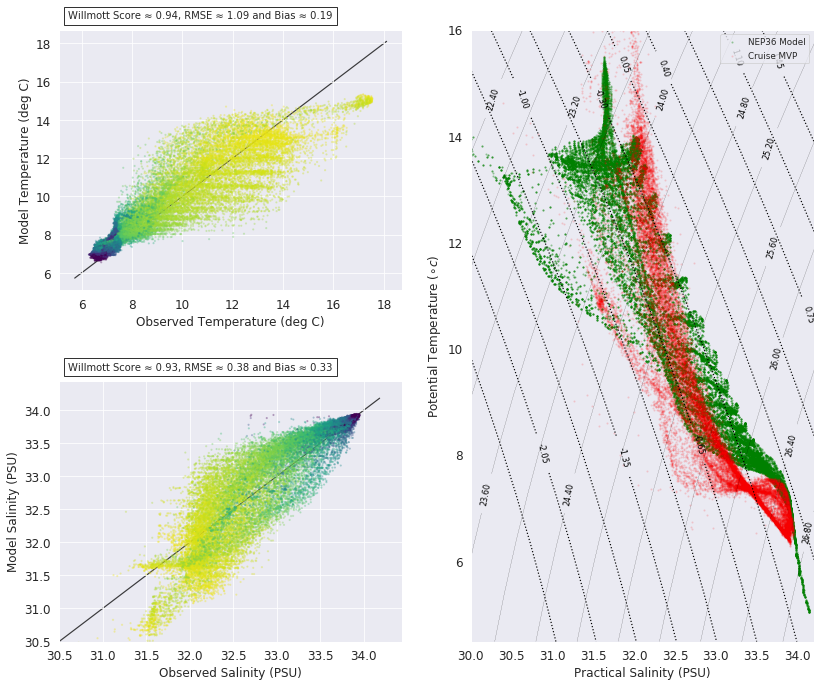

In [103]:
print("Model vs Observed")

cmin = 0
cmax = 150



import matplotlib as mpl
# norm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)
# cmap = plt.get_cmap('summer')
cmap = plt.get_cmap('viridis_r')
# cmap = cmo.cm.deep

df =pd.DataFrame()
# df['Observed_temp'] = np.ndarray.flatten(mvp_tem_D_actual)
# df['Model_temp'] = np.ndarray.flatten(model_tem_D_actual)
# df['Observed_Salinity'] = np.ndarray.flatten(mvp_sal_D_actual)
# df['Model_Salinity'] = np.ndarray.flatten(model_sal_D_actual)
# df["Depth (m)"]  = np.ndarray.flatten(depth_D_actual)

df['Observed_temp'] = np.concatenate((mvp_tem_A, mvp_tem_B, mvp_tem_D, mvp_tem_E, mvp_tem_G))
df['Model_temp'] = np.concatenate((model_tem_A, model_tem_B, model_tem_D, model_tem_E, model_tem_G))
df['Observed_Salinity'] = np.concatenate((mvp_sal_A, mvp_sal_B, mvp_sal_D, mvp_sal_E, mvp_sal_G))
df['Model_Salinity'] = np.concatenate((model_sal_A, model_sal_B, model_sal_D, model_sal_E, model_sal_G))
df["Depth (m)"] = np.concatenate((depth_A, depth_B, depth_D, depth_E, depth_G))


# depth_mvp_all = np.empty_like(mvp_sal_loc)

# for p in np.arange(depth_mvp_all.shape[0]):
#     depth_mvp_all[p,:] = zlevels[p]



# fig, (ax1,ax2,ax3)  = plt.subplots(1,3,figsize=(15,5))

fig = plt.figure(1, figsize=(18,10))


gs = gridspec.GridSpec(2, 3)
# gs.update(left=0.55, right=0.98, hspace=0.05)
ax1 = plt.subplot(gs[:-1, :-2])
ax2 = plt.subplot(gs[-1, :-2])
ax3 = plt.subplot(gs[:, 1])
                 
# gs = gridspec.GridSpec(1,3, width_ratios=[1,1,1])

gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.2, hspace=0.35)

# ax1 = plt.subplot(gs[0,0])

# ax2 = plt.subplot(gs[0,1])

# ax3 = plt.subplot(gs[0,2])


# p = sns.relplot(x="Observed_temp", y="Model_temp", hue="Depth (m)",  sizes=(1,10),data=df, legend='brief',palette=cmo.cm.oxy)

p = df.plot.scatter(x="Observed_temp", y="Model_temp", c = "Depth (m)", s = 2, ax = ax1, cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25, colorbar=False)

leg = ax1.get_legend()
ax1.legend(loc="best")

lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_tem(df['Observed_temp'], df['Model_temp'], df["Depth (m)"])
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=10), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax1.transAxes
                       )
ax1.add_artist(anchored_text)
ax1.tick_params(axis='both',labelsize =12)
ax1.set_xlabel('Observed Temperature (deg C)', fontsize = 12)
ax1.set_ylabel('Model Temperature (deg C)', fontsize = 12)


q = df.plot.scatter(x="Observed_Salinity", y="Model_Salinity", c = "Depth (m)", s =2, ax = ax2,  cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25, colorbar=False)


lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_sal(df['Observed_Salinity'], df['Model_Salinity'], df["Depth (m)"])
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=10), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax2.transAxes
                       )
ax2.add_artist(anchored_text)
ax2.tick_params(axis='both',labelsize =12)
ax2.set_xlabel('Observed Salinity (PSU)', fontsize = 12)
ax2.set_ylabel('Model Salinity (PSU)', fontsize = 12)


ax2.set_ylim(bottom=30.5)
ax2.set_xlim(left=30.5)

# Figure out boudaries (mins and maxs)
smin = np.nanmin(model_sal_G)  - (0.01 * np.nanmin(model_sal_G))
smax = np.nanmax(model_sal_E)  + (0.01 * np.nanmax(model_sal_E))
tmin = np.nanmin(model_tem_E) - (0.1 * np.nanmax(model_tem_E))
tmax = np.nanmax(model_tem_E) + (0.1 * np.nanmax(model_tem_E))
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
SA = np.empty((xdim))
CT = np.empty((ydim)) 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        
        SA[i] = gsw.SA_from_SP(si[i], 0, np.mean(lon), np.mean(lat))

        CT[j] = gsw.CT_from_pt(si[i], ti[j])
        
        dens_1[j,i]=gsw.rho(SA[i],CT[j],0)
        
        spic_1[j,i] = gsw.spiciness0(SA[i],CT[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000
 


ind = np.argsort(df['Depth (m)'])

dz = pd.DataFrame()

dz['Model_temp']    = df['Model_temp'][ind]
dz['Observed_temp'] = df['Observed_temp'][ind]

dz['Model_Salinity'] = df['Model_Salinity'][ind]
dz['Observed_Salinity'] = df['Observed_Salinity'][ind]

dz['Depth (m)'] = df['Depth (m)'][ind]

p = dz.plot.scatter(x="Model_Salinity", y="Model_temp", c = 'green', s = 2, ax = ax3,  alpha = 0.25, label = 'NEP36 Model')

s = dz.plot.scatter(x="Observed_Salinity", y="Observed_temp", c = 'red', s = 2, ax = ax3,  alpha = 0.1, label = 'Cruise MVP')

# ax3.legend((p, s),
#            ('NEP36 Model', 'Cruise MVP'),
#            scatterpoints=1,
#            loc='lower left',
#            ncol=1,
#            fontsize=8)

diff_tem = dz['Model_temp'] - dz["Observed_temp"]
diff_sal = dz['Model_Salinity'] - dz['Observed_Salinity']

# n = 500
# ax3.fill_between(dz['Model_Salinity'][::n], dz['Model_temp'][::n], dz['Model_temp'][::n]+diff_tem[::n],\
#                 color='red', alpha=0.08)

# ax3.errorbar(x = df['Model_Salinity'], y = df['Model_temp'], xerr=diff_sal, yerr=diff_tem, \
#             errorevery=500, ecolor= 'red', fmt=None, alpha = 0.3,)

CS = ax3.contour(si,ti,dens_1, np.arange(22.4,27,0.4), linestyles='dashed', linewidths = 0.2,colors='k')
CS1 = ax3.contour(si,ti,spic_1,np.arange(-2.4,1.5,0.35), linestyles='dotted', colors='k')
plt.clabel(CS, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.2f') # Label every second level


# CS = plt.contour(si,ti,dens_1, linestyles='dashed', colors='k')
# CS1 = plt.contour(si,ti,spic_1, linestyles='solid', colors='k')
# plt.clabel(CS, fontsize=8, inline=1, fmt='%0.1f') # Label every second level
# plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.1f') # Label every second level


ax3.set_xlim(30,34.2)
ax3.set_ylim(top=16)



 
ax3.set_xlabel('Practical Salinity (PSU)', fontsize = 12)
ax3.set_ylabel('Potential Temperature ($\circ c$)', fontsize = 12)
ax3.tick_params(axis='both',labelsize =12)

ax3.grid()

legend = ax3.legend(loc='upper right')




# fig.tight_layout()

# im = plt.gca().get_children()[0]
# cax = fig.add_axes([0.65,0.1,0.025,0.8]) 
# cbar = fig.colorbar(im, cax=cax)
# cbar.set_label("Depth (m)")


In [37]:
import matplotlib.cm as cm

In [151]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


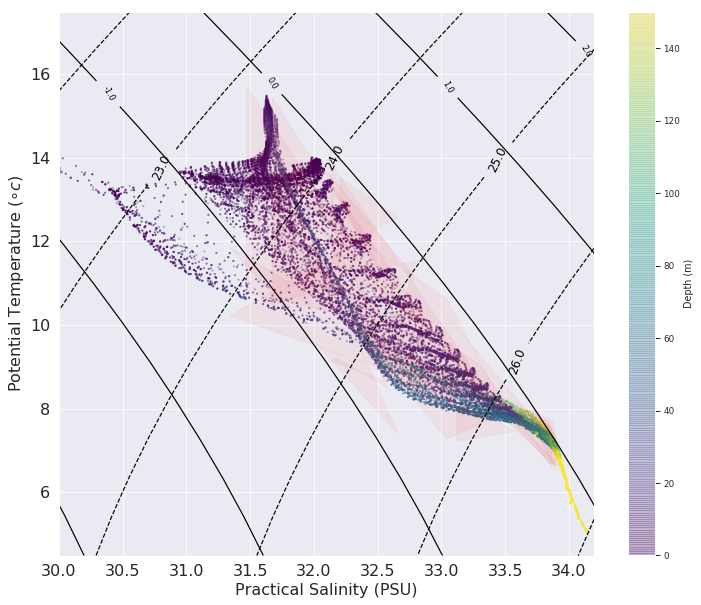

In [222]:

# cmap = cmo.cm.thermal
cmap = plt.get_cmap('viridis')



# colors = cmo.cm.phase(np.linspace(0, 1, 200))

# model_survey_sal_G1 = model_survey_sal_G[model_survey_sal_G>30]
# model_survey_temp_G1 = model_survey_temp_G[model_survey_sal_G>30]

# Figure out boudaries (mins and maxs)
smin = np.nanmin(model_sal_G)  - (0.01 * np.nanmin(model_sal_G))
smax = np.nanmax(model_sal_E)  + (0.01 * np.nanmax(model_sal_E))
tmin = np.nanmin(model_tem_E) - (0.1 * np.nanmax(model_tem_E))
tmax = np.nanmax(model_tem_E) + (0.1 * np.nanmax(model_tem_E))
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
SA = np.empty((xdim))
CT = np.empty((ydim)) 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        
        SA[i] = gsw.SA_from_SP(si[i], 0, np.mean(lon), np.mean(lat))

        CT[j] = gsw.CT_from_pt(si[i], ti[j])
        
        dens_1[j,i]=gsw.rho(SA[i],CT[j],0)
        
        spic_1[j,i] = gsw.spiciness0(SA[i],CT[j])
 
# Substract 1000 to convert to sigma-t
dens_1 = dens_1 - 1000
 
# Plot data ***********************************************
# fig1, ax = plt.subplots(1, 1, figsize=(10,10))

fig = plt.figure(1, figsize=(12,10))
                 
gs = gridspec.GridSpec(1,1)

# gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

ax = plt.subplot(gs[0,0])

# ax2 = plt.subplot(gs[0,1])

# m = cm.ScalarMappable(cmap=plt.get_cmap(cmo.cm.balance))
# m.set_array(df['Depth (m)'])
# m.set_clim(50, 200)
# plt.colorbar(m)

# df =pd.DataFrame()

# df['Observed_temp'] = np.concatenate((mvp_tem_A, mvp_tem_B, mvp_tem_D, mvp_tem_E, mvp_tem_G))
# df['Model_temp'] = np.concatenate((model_tem_A, model_tem_B, model_tem_D, model_tem_E, model_tem_G))
# df['Observed_Salinity'] = np.concatenate((mvp_sal_A, mvp_sal_B, mvp_sal_D, mvp_sal_E, mvp_sal_G))
# df['Model_Salinity'] = np.concatenate((model_sal_A, model_sal_B, model_sal_D, model_sal_E, model_sal_G))
# df["Depth (m)"] = np.concatenate((depth_A, depth_B, depth_D, depth_E, depth_G))


p = df.plot.scatter(x="Model_Salinity", y="Model_temp", c = 'Depth (m)', s = 2, ax = ax, cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25)

diff_tem = df['Model_temp'] - df["Observed_temp"]
diff_sal = df['Model_Salinity'] - df['Observed_Salinity']

n = 800
ax.fill_between(df['Model_Salinity'][::n], df['Model_temp'][::n]+diff_tem[::n], df['Model_temp'][::n]-diff_tem[::n], \
                color='red', alpha=0.05)

# ax.fill_between(df['Model_Salinity'][::500]+diff_sal[::500],df['Model_Salinity'][::500]-diff_sal[::500], df['Model_temp'][::500], \
#                 color='red', alpha=0.05)
# ax.errorbar(x = df['Model_Salinity'], y = df['Model_temp'], xerr=diff_sal, \
#             errorevery=500, ecolor= 'red', fmt=None, alpha = 0.3,)


# errorfill(alpha_fill=0.1, ax=ax, color='red', x = df['Model_Salinity'], \
#           y = df['Model_temp'], yerr=diff_tem, fmt=None)
CS = plt.contour(si,ti,dens_1, linestyles='dashed', colors='k')
CS1 = plt.contour(si,ti,spic_1, linestyles='solid', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%0.1f') # Label every second level
plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.1f') # Label every second level


ax.set_xlim(30,34.2)



 
ax.set_xlabel('Practical Salinity (PSU)', fontsize = 16)
ax.set_ylabel('Potential Temperature ($\circ c$)', fontsize = 16)
ax.tick_params(axis='both',labelsize =16)
# ax.set_xlim(31.5,)


legend = ax.legend(loc='upper right', fancybox=True, framealpha=0.25)

In [64]:
type(np.array(df['Depth (m)']).astype(int))

numpy.ndarray

For Survey E


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


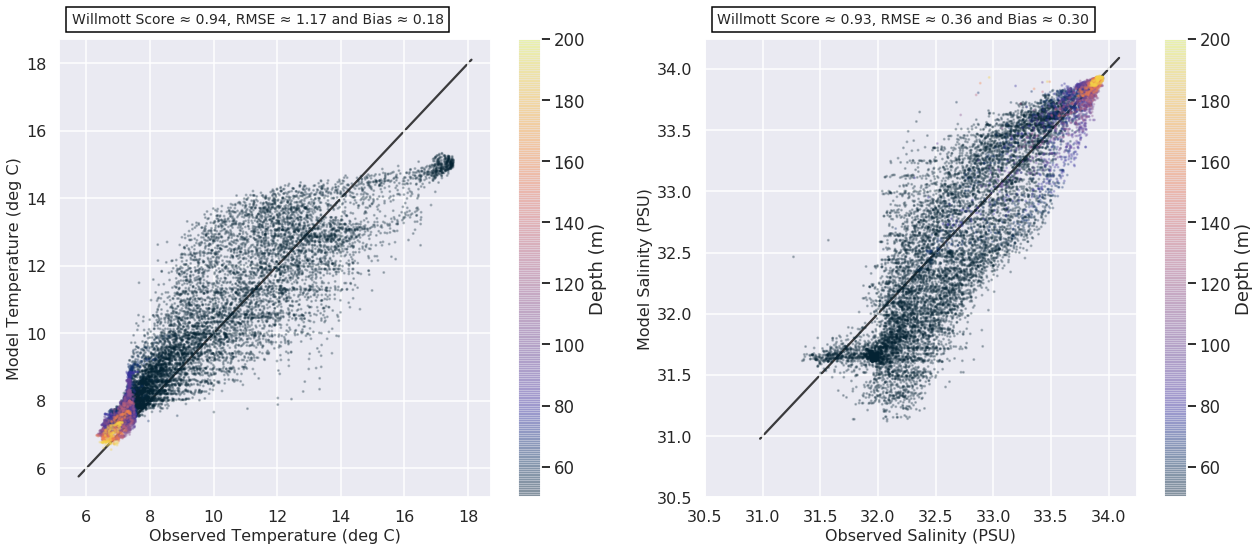

In [108]:
print("For Survey E")

cmin = 50
cmax = 200



import matplotlib as mpl
# norm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)
# cmap = plt.get_cmap('summer')
# cmap = plt.get_cmap('icefire')
cmap = cmo.cm.thermal

df =pd.DataFrame()
df['Observed_temp'] = np.ndarray.flatten(mvp_tem_E)
df['Model_temp'] = np.ndarray.flatten(model_tem_E)
df['Observed_Salinity'] = np.ndarray.flatten(mvp_sal_E)
df['Model_Salinity'] = np.ndarray.flatten(model_sal_E)
df["Depth (m)"]  = np.ndarray.flatten(depth_E)

# df['Observed_temp'] = np.concatenate((mvp_tem_A, mvp_tem_B, mvp_tem_D, mvp_tem_E, mvp_tem_G))
# df['Model_temp'] = np.concatenate((model_tem_A, model_tem_B, model_tem_D, model_tem_E, model_tem_G))
# df['Observed_Salinity'] = np.concatenate((mvp_sal_A, mvp_sal_B, mvp_sal_D, mvp_sal_E, mvp_sal_G))
# df['Model_Salinity'] = np.concatenate((model_sal_A, model_sal_B, model_sal_D, model_sal_E, model_sal_G))
# df["Depth (m)"] = np.concatenate((depth_A, depth_B, depth_D, depth_E, depth_G))


# depth_mvp_all = np.empty_like(mvp_sal_loc)

# for p in np.arange(depth_mvp_all.shape[0]):
#     depth_mvp_all[p,:] = zlevels[p]



# fig, (ax1,ax2,ax3)  = plt.subplots(1,3,figsize=(15,5))

fig = plt.figure(1, figsize=(18,8))
                 
gs = gridspec.GridSpec(1,2, width_ratios=[1,1])

# gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

ax1 = plt.subplot(gs[0,0])

ax2 = plt.subplot(gs[0,1])

# ax3 = plt.subplot(gs[0,2])


            

# p = sns.relplot(x="Observed_temp", y="Model_temp", hue="Depth (m)",  sizes=(1,10),data=df, legend='brief',palette=cmo.cm.oxy)

p = df.plot.scatter(x="Observed_temp", y="Model_temp", c = "Depth (m)", s = 2, ax = ax1, cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25)

leg = ax1.get_legend()
ax1.legend(loc="best")

lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_tem(df['Observed_temp'], df['Model_temp'], df["Depth (m)"])
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=14), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax1.transAxes
                       )
ax1.add_artist(anchored_text)
ax1.tick_params(axis='both',labelsize =16)
ax1.set_xlabel('Observed Temperature (deg C)', fontsize = 16)
ax1.set_ylabel('Model Temperature (deg C)', fontsize = 16)


q = df.plot.scatter(x="Observed_Salinity", y="Model_Salinity", c = "Depth (m)", s =2, ax = ax2,  cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25)


lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_sal(df['Observed_Salinity'], df['Model_Salinity'], df["Depth (m)"])
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=14), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax2.transAxes
                       )
ax2.add_artist(anchored_text)
ax2.tick_params(axis='both',labelsize =16)
ax2.set_xlabel('Observed Salinity (PSU)', fontsize = 16)
ax2.set_ylabel('Model Salinity (PSU)', fontsize = 16)

ax2.set_ylim(bottom=30.5)
ax2.set_xlim(left=30.5)

fig.tight_layout()


For Survey G


/home/ssahu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


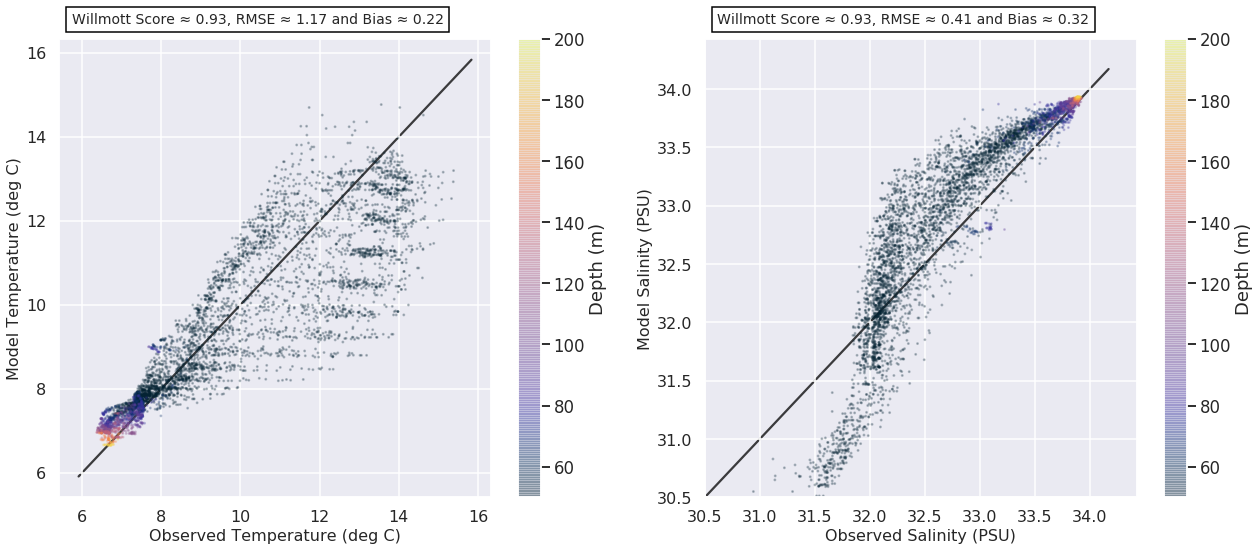

In [109]:
print("For Survey G")

cmin = 50
cmax = 200



import matplotlib as mpl
# norm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)
# cmap = plt.get_cmap('summer')
# cmap = plt.get_cmap('icefire')
cmap = cmo.cm.thermal

df =pd.DataFrame()
df['Observed_temp'] = np.ndarray.flatten(mvp_tem_G)
df['Model_temp'] = np.ndarray.flatten(model_tem_G)
df['Observed_Salinity'] = np.ndarray.flatten(mvp_sal_G)
df['Model_Salinity'] = np.ndarray.flatten(model_sal_G)
df["Depth (m)"]  = np.ndarray.flatten(depth_G)

# df['Observed_temp'] = np.concatenate((mvp_tem_A, mvp_tem_B, mvp_tem_D, mvp_tem_E, mvp_tem_G))
# df['Model_temp'] = np.concatenate((model_tem_A, model_tem_B, model_tem_D, model_tem_E, model_tem_G))
# df['Observed_Salinity'] = np.concatenate((mvp_sal_A, mvp_sal_B, mvp_sal_D, mvp_sal_E, mvp_sal_G))
# df['Model_Salinity'] = np.concatenate((model_sal_A, model_sal_B, model_sal_D, model_sal_E, model_sal_G))
# df["Depth (m)"] = np.concatenate((depth_A, depth_B, depth_D, depth_E, depth_G))


# depth_mvp_all = np.empty_like(mvp_sal_loc)

# for p in np.arange(depth_mvp_all.shape[0]):
#     depth_mvp_all[p,:] = zlevels[p]



# fig, (ax1,ax2,ax3)  = plt.subplots(1,3,figsize=(15,5))

fig = plt.figure(1, figsize=(18,8))
                 
gs = gridspec.GridSpec(1,2, width_ratios=[1,1])

# gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)

ax1 = plt.subplot(gs[0,0])

ax2 = plt.subplot(gs[0,1])

# ax3 = plt.subplot(gs[0,2])


            

# p = sns.relplot(x="Observed_temp", y="Model_temp", hue="Depth (m)",  sizes=(1,10),data=df, legend='brief',palette=cmo.cm.oxy)

p = df.plot.scatter(x="Observed_temp", y="Model_temp", c = "Depth (m)", s = 2, ax = ax1, cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25)

leg = ax1.get_legend()
ax1.legend(loc="best")

lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_tem(df['Observed_temp'], df['Model_temp'], df["Depth (m)"])
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=14), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax1.transAxes
                       )
ax1.add_artist(anchored_text)
ax1.tick_params(axis='both',labelsize =16)
ax1.set_xlabel('Observed Temperature (deg C)', fontsize = 16)
ax1.set_ylabel('Model Temperature (deg C)', fontsize = 16)


q = df.plot.scatter(x="Observed_Salinity", y="Model_Salinity", c = "Depth (m)", s =2, ax = ax2,  cmap = cmap, vmin = cmin, vmax = cmax, alpha = 0.25)


lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
gamma2,rms_error,ws = get_stat_sal(df['Observed_Salinity'], df['Model_Salinity'], df["Depth (m)"])
anchored_text = AnchoredText("Willmott Score \u2248 {w:.2f}, RMSE \u2248 {r:.2f} and Bias \u2248 {b:.2f}". format(w = ws, r = rms_error, b = gamma2),prop=dict(size=14), loc=3, frameon=True,
                       bbox_to_anchor=(0., 1.),
                       bbox_transform=ax2.transAxes
                       )
ax2.add_artist(anchored_text)
ax2.tick_params(axis='both',labelsize =16)
ax2.set_xlabel('Observed Salinity (PSU)', fontsize = 16)
ax2.set_ylabel('Model Salinity (PSU)', fontsize = 16)

ax2.set_ylim(bottom=30.5)
ax2.set_xlim(left=30.5)

fig.tight_layout()


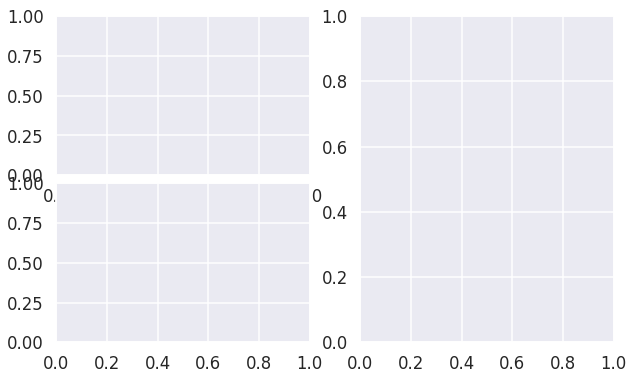

In [91]:
fig = plt.figure(figsize=(18,6))



gs2 = gridspec.GridSpec(2, 2)
gs2.update(left=0.55, right=0.98, hspace=0.05)
ax5 = plt.subplot(gs2[:-1, :-1])
ax6 = plt.subplot(gs2[-1, :-1])
ax4 = plt.subplot(gs2[:, -1])
